# Fake News Classification using Sequential Tensorflow

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Exploration

In [2]:
fake = pd.read_csv('Fake.csv')
fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [3]:
real = pd.read_csv('True.csv')
real

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [4]:
fake.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [5]:
real.isna().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [6]:
# !conda install -c conda-forge jedi

In [7]:
# !pip install jedi==0.17.2

In [8]:
real.subject.value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

In [9]:
fake.subject.value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

In [10]:
real['is_fake'] = 0
fake['is_fake'] = 1

## Join fake news and real news dataset

In [11]:
news = pd.concat([real, fake])
news

,title,text,subject,date,is_fake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1


In [12]:
news.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 23480
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   is_fake  44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 2.1+ MB


In [13]:
news.drop('date', axis=1, inplace=True)
news

,title,text,subject,is_fake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,0
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,1
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,1
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,1
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,1


In [14]:
news.isna().sum()

title      0
text       0
subject    0
is_fake    0
dtype: int64

In [15]:
news.dropna(inplace=True)
news.reset_index(inplace=True, drop=True)

In [16]:
news.is_fake.value_counts()

1    23481
0    21417
Name: is_fake, dtype: int64

In [17]:
news.subject.value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

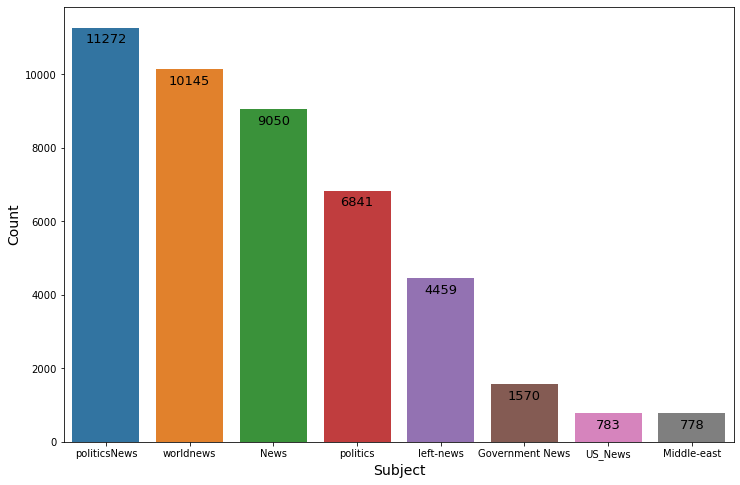

In [18]:
plt.figure(figsize=(12, 8))
splot = sns.barplot(x=news.subject.value_counts().index, y=news.subject.value_counts())
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha='center', va='center',
                   size=13,
                   xytext=(0, -12),
                   textcoords='offset points')
plt.xlabel("Subject", size=14)
plt.ylabel("Count", size=14);

In [19]:
news

,title,text,subject,is_fake
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,0
...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,1
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,1
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,1
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,1


In [20]:
from sklearn.utils import shuffle

In [21]:
news = shuffle(news, random_state=12)
news.reset_index(drop=True, inplace=True)

In [22]:
news_final = news.copy()
news_final

,title,text,subject,is_fake
0,UAE denounces U.S. recognition of Jerusalem as...,DUBAI (Reuters) - The United Arab Emirates has...,worldnews,0
1,"Trump Whines About Fake News, CNN’s Chris Cuo...","By now, we re all sick and tired of hearing Do...",News,1
2,Czechs pin hopes on billionaire Babis to fix t...,PRAGUE (Reuters) - The traffic jams and roadwo...,worldnews,0
3,LOCAL REPORTER IN DEEP BLUE STATE Stuns Libera...,"We took a very hard look at these numbers, an...",politics,1
4,Highlights: The Trump presidency on April 21 a...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,0
...,...,...,...,...
44893,TRUMP WAS RIGHT! Audit Reveals State Dept. Cyb...,New documents appear to show a pattern of dete...,politics,1
44894,BILL O’REILLY IS BACK! Tell Fans He’s Not Goin...,Bill O Reilly is back! And if you listen to hi...,left-news,1
44895,Factbox: Countries which have expelled North K...,SEOUL (Reuters) - In response to Pyongyang s n...,worldnews,0
44896,TWO SENATORS SAY NO TO MOVING MUSLIM TERRORIST...,Yeah because everyone wants these guys living ...,Government News,1


In [23]:
# !pip install nltk

In [24]:
# !pip install tensorflow

## Analyzing text data and building NLP model

In [25]:
import tensorflow as tf
import nltk
import re
# nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

In [26]:
stoplist = stopwords.words('English')
vocab_size = 10000
corpus = []
ps = PorterStemmer()

In [27]:
news['title'].str.split().str.len()

0        10
1        14
2        10
3        16
4        12
         ..
44893    11
44894    29
44895    11
44896    14
44897    11
Name: title, Length: 44898, dtype: int64

In [28]:
for i in range(0,len(news_final)):
    message = re.sub('[^a-zA-Z]', ' ', news_final['title'][i])
    message = message.lower()
    message = message.split()
    message = [ps.stem(word) for word in message if not word in stoplist]
    message = ' '.join(message)
    corpus.append(message)

In [29]:
corpus

['uae denounc u recognit jerusalem israel capit agenc',
 'trump whine fake news cnn chri cuomo shut perfectli video',
 'czech pin hope billionair babi fix countri',
 'local report deep blue state stun liber goe rogu tell truth gun video',
 'highlight trump presid april p edt gmt',
 'brazil captur want arm traffick paraguay',
 'violent democrat punch harass trump support burn flag fundrais video',
 'new school offer educ salvat syrian girl lebanon',
 'croni corrupt polit obama admin block fbi clinton foundat investig',
 'trump bank review rais fear global standard talk',
 'boiler room ep non binari blond social justic triggli convuls',
 'u judg order former trump aid stay home arrest',
 'video polit correct caus death europ allow america next',
 'war coal first new coal mine trump presid open pennsylvania anoth promis kept video',
 'china pledg open provid inform china daili',
 'hous intellig committe trump lie obama absolut zero evid wiretap video',
 'trump ghani agre u help develop af

In [30]:
# !pip install keras

In [31]:
from keras.preprocessing.text import one_hot
onehot_rep = [one_hot(word, vocab_size) for word in corpus]

In [32]:
onehot_rep

[[105, 5645, 4006, 6362, 5054, 5199, 2698, 4064],
 [6092, 2585, 3055, 1461, 7517, 3425, 4511, 6735, 9608, 2023],
 [5524, 6430, 5951, 869, 8626, 9965, 7327],
 [576, 3409, 4942, 504, 4266, 6669, 6446, 5529, 1901, 1620, 3183, 259, 2023],
 [4107, 6092, 1802, 8767, 4764, 1476, 8788],
 [6517, 8488, 5049, 2400, 7207, 422],
 [4885, 517, 1916, 7939, 6092, 9743, 3575, 8037, 2034, 2023],
 [4560, 4469, 6152, 7717, 9174, 5902, 7603, 910],
 [2823, 9673, 984, 9880, 8305, 878, 501, 5371, 9624, 5564],
 [6092, 8787, 8310, 3050, 1672, 6381, 8397, 2692],
 [1745, 8501, 4560, 2796, 2032, 1095, 2522, 5903, 3989, 5696],
 [4006, 8467, 5151, 211, 6092, 3550, 9432, 7300, 4256],
 [2023, 984, 9750, 6557, 7314, 5062, 9739, 2377, 9139],
 [3567,
  3386,
  2959,
  4560,
  3386,
  4405,
  6092,
  1802,
  4112,
  8184,
  3592,
  5572,
  1752,
  2023],
 [6340, 8050, 4112, 839, 5464, 6340, 1231],
 [9251, 851, 7784, 6092, 4528, 9880, 827, 5826, 3903, 6795, 2023],
 [6092, 951, 7331, 4006, 2246, 6760, 8845, 6486, 4723, 9550]

In [33]:
from keras.preprocessing.sequence import pad_sequences
embedded_data = pad_sequences(onehot_rep, maxlen=20, padding='pre')

In [34]:
embedded_data

array([[   0,    0,    0, ..., 5199, 2698, 4064],
       [   0,    0,    0, ..., 6735, 9608, 2023],
       [   0,    0,    0, ..., 8626, 9965, 7327],
       ...,
       [   0,    0,    0, ..., 9784, 3047, 3822],
       [   0,    0,    0, ..., 3764, 6931, 4266],
       [   0,    0,    0, ..., 7354,  829, 6272]])

In [35]:
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout
from tensorflow.keras.models import Sequential

embedding_vector_features = 40
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_features, input_length=20))

model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 40)            400000    
_________________________________________________________________
dropout (Dropout)            (None, 20, 40)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               56400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 101       
Total params: 456,501
Trainable params: 456,501
Non-trainable params: 0
_________________________________________________________________
None


In [36]:
X_final = np.array(embedded_data)
y_final = np.array(news_final['is_fake'])
X_final.shape, y_final.shape

((44898, 20), (44898,))

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, shuffle=True)

In [38]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, verbose=2, batch_size=8)

Epoch 1/10
4490/4490 - 63s - loss: 0.1799 - accuracy: 0.9250 - val_loss: 0.1319 - val_accuracy: 0.9468
Epoch 2/10
4490/4490 - 64s - loss: 0.1031 - accuracy: 0.9609 - val_loss: 0.1219 - val_accuracy: 0.9520
Epoch 3/10
4490/4490 - 65s - loss: 0.0753 - accuracy: 0.9715 - val_loss: 0.1288 - val_accuracy: 0.9502
Epoch 4/10
4490/4490 - 64s - loss: 0.0581 - accuracy: 0.9784 - val_loss: 0.1373 - val_accuracy: 0.9513
Epoch 5/10
4490/4490 - 67s - loss: 0.0436 - accuracy: 0.9835 - val_loss: 0.1490 - val_accuracy: 0.9537
Epoch 6/10
4490/4490 - 65s - loss: 0.0361 - accuracy: 0.9866 - val_loss: 0.1601 - val_accuracy: 0.9500
Epoch 7/10
4490/4490 - 65s - loss: 0.0297 - accuracy: 0.9899 - val_loss: 0.1669 - val_accuracy: 0.9498
Epoch 8/10
4490/4490 - 67s - loss: 0.0245 - accuracy: 0.9914 - val_loss: 0.1880 - val_accuracy: 0.9536
Epoch 9/10
4490/4490 - 66s - loss: 0.0177 - accuracy: 0.9942 - val_loss: 0.2282 - val_accuracy: 0.9502
Epoch 10/10
4490/4490 - 66s - loss: 0.0164 - accuracy: 0.9944 - val_loss:

In [39]:
y_pred = model.predict_classes(X_test)

C:\Users\nrpra\ML\projects\env\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


## Model evaluation

In [40]:
from sklearn.metrics import confusion_matrix

In [41]:
confusion_matrix(y_test, y_pred)

array([[4030,  217],
       [ 238, 4495]], dtype=int64)

In [42]:
from sklearn.metrics import accuracy_score

In [43]:
accuracy_score(y_test, y_pred)

0.9493318485523385

In [45]:
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      4247
           1       0.95      0.95      0.95      4733

    accuracy                           0.95      8980
   macro avg       0.95      0.95      0.95      8980
weighted avg       0.95      0.95      0.95      8980

